In [1]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import pandas as pd

df = pd.read_csv('./datasets.csv', engine='python')
df1=df.head(250)
df2=df1.drop(0)
df2.head()

,%,asym,positive,Unnamed: 3,node1_name,node2_name,node1_gender,node2_gender,node1_age,node2_age,latitude,longitude
1,1,10.0,1.0,1.095136e+09,SHIVANI,KUSHAL,FEMALE,MALE,45-65,45-65,23.836049,91.279386
2,2,3.0,1.0,1.097725e+09,RAMDIN VERMA,ISHA,MALE,FEMALE,65+,18-45,19.094571,74.738432
3,4,4.0,1.0,1.098388e+09,SHARAT CHANDRAN,SHARAT CHANDRAN,MALE,MALE,45-65,45-65,23.025793,72.587265
4,5,5.0,1.0,1.098425e+09,SMT SHYANI DEVI,SMT SHYANI DEVI,FEMALE,FEMALE,65+,65+,23.836049,91.279386
5,2,3.0,1.0,1.098490e+09,RAMDIN VERMA,ISHA,MALE,FEMALE,65+,18-45,23.836049,91.279386


In [2]:
df3=df2.rename({"%":"node1","asym":"node2","positive":"edges", 'Unnamed: 3' : "time"},axis=1)
df3=df3.astype({'node1': 'int64'})
df3.dtypes
df3

,node1,node2,edges,time,node1_name,node2_name,node1_gender,node2_gender,node1_age,node2_age,latitude,longitude
1,1,10.0,1.0,1.095136e+09,SHIVANI,KUSHAL,FEMALE,MALE,45-65,45-65,23.836049,91.279386
2,2,3.0,1.0,1.097725e+09,RAMDIN VERMA,ISHA,MALE,FEMALE,65+,18-45,19.094571,74.738432
3,4,4.0,1.0,1.098388e+09,SHARAT CHANDRAN,SHARAT CHANDRAN,MALE,MALE,45-65,45-65,23.025793,72.587265
4,5,5.0,1.0,1.098425e+09,SMT SHYANI DEVI,SMT SHYANI DEVI,FEMALE,FEMALE,65+,65+,23.836049,91.279386
5,2,3.0,1.0,1.098490e+09,RAMDIN VERMA,ISHA,MALE,FEMALE,65+,18-45,23.836049,91.279386
...,...,...,...,...,...,...,...,...,...,...,...,...
245,91,164.0,1.0,1.112657e+09,SANTNA,PAWAN,FEMALE,MALE,45-65,65+,22.562600,88.363000
246,24,97.0,1.0,1.112680e+09,KHADAK SINGH,ANY BOBBY,MALE,FEMALE,18-45,45-65,24.827327,92.797868
247,185,186.0,1.0,1.112746e+09,VIDHI,RAJENDER,FEMALE,MALE,65+,18-45,22.562600,88.363000
248,201,201.0,1.0,1.112752e+09,RAKHI,RAKHI,FEMALE,FEMALE,18-45,18-45,23.182387,75.776433


In [3]:
df31=df3.copy()
df31

,node1,node2,edges,time,node1_name,node2_name,node1_gender,node2_gender,node1_age,node2_age,latitude,longitude
1,1,10.0,1.0,1.095136e+09,SHIVANI,KUSHAL,FEMALE,MALE,45-65,45-65,23.836049,91.279386
2,2,3.0,1.0,1.097725e+09,RAMDIN VERMA,ISHA,MALE,FEMALE,65+,18-45,19.094571,74.738432
3,4,4.0,1.0,1.098388e+09,SHARAT CHANDRAN,SHARAT CHANDRAN,MALE,MALE,45-65,45-65,23.025793,72.587265
4,5,5.0,1.0,1.098425e+09,SMT SHYANI DEVI,SMT SHYANI DEVI,FEMALE,FEMALE,65+,65+,23.836049,91.279386
5,2,3.0,1.0,1.098490e+09,RAMDIN VERMA,ISHA,MALE,FEMALE,65+,18-45,23.836049,91.279386
...,...,...,...,...,...,...,...,...,...,...,...,...
245,91,164.0,1.0,1.112657e+09,SANTNA,PAWAN,FEMALE,MALE,45-65,65+,22.562600,88.363000
246,24,97.0,1.0,1.112680e+09,KHADAK SINGH,ANY BOBBY,MALE,FEMALE,18-45,45-65,24.827327,92.797868
247,185,186.0,1.0,1.112746e+09,VIDHI,RAJENDER,FEMALE,MALE,65+,18-45,22.562600,88.363000
248,201,201.0,1.0,1.112752e+09,RAKHI,RAKHI,FEMALE,FEMALE,18-45,18-45,23.182387,75.776433


In [4]:
e=df3['node1'].max()
print(e)
e1=df3['time'].max()
print(e1)

df31['sum']=0
df31=df31.astype({'sum': 'float'})
for i in range(1,e):
    #print('p')
    for index,row in df31.iterrows():
       # print('k')
        if df31.at[index,'node1']==i:
           # print('j')
            if e1-df31.at[index,'time']<=106075:
                df31.at[index,'sum']=1
            elif e1-df31.at[index,'time']>106075 and e1-df31.at[index,'time']<1905075:
                df31.at[index,'sum']= (((e1-df31.at[index,'time'])/1905075)**2)+1
            else:
                df31.at[index,'sum']=0
            
            #df31.at[index,'sum']= (0.5**(((e1)-df31.at[index,'time'])/e1))
            #df31.at[index,'sum']+= 1

#df31.groupby(['node1','time']).sum()
#df31.groupby(['node1'])['sum'].agg('sum')

df31

202
1112753451.0


,node1,node2,edges,time,node1_name,node2_name,node1_gender,node2_gender,node1_age,node2_age,latitude,longitude,sum
1,1,10.0,1.0,1.095136e+09,SHIVANI,KUSHAL,FEMALE,MALE,45-65,45-65,23.836049,91.279386,0.0
2,2,3.0,1.0,1.097725e+09,RAMDIN VERMA,ISHA,MALE,FEMALE,65+,18-45,19.094571,74.738432,0.0
3,4,4.0,1.0,1.098388e+09,SHARAT CHANDRAN,SHARAT CHANDRAN,MALE,MALE,45-65,45-65,23.025793,72.587265,0.0
4,5,5.0,1.0,1.098425e+09,SMT SHYANI DEVI,SMT SHYANI DEVI,FEMALE,FEMALE,65+,65+,23.836049,91.279386,0.0
5,2,3.0,1.0,1.098490e+09,RAMDIN VERMA,ISHA,MALE,FEMALE,65+,18-45,23.836049,91.279386,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,91,164.0,1.0,1.112657e+09,SANTNA,PAWAN,FEMALE,MALE,45-65,65+,22.562600,88.363000,1.0
246,24,97.0,1.0,1.112680e+09,KHADAK SINGH,ANY BOBBY,MALE,FEMALE,18-45,45-65,24.827327,92.797868,1.0
247,185,186.0,1.0,1.112746e+09,VIDHI,RAJENDER,FEMALE,MALE,65+,18-45,22.562600,88.363000,1.0
248,201,201.0,1.0,1.112752e+09,RAKHI,RAKHI,FEMALE,FEMALE,18-45,18-45,23.182387,75.776433,1.0


In [5]:
k=df31.copy()
k=k.drop(["node2","edges","time"],axis=1)
k

aggregation_functions = {'sum': 'max'}
df_new = k.groupby(k['node1']).aggregate(aggregation_functions)
df_new

,sum
node1,
1,0.000000
2,0.000000
4,0.000000
5,1.539111
6,0.000000
...,...
197,1.017434
198,1.016031
200,1.006165


In [6]:
df4=df3.drop(columns="time")

df4.head()

,node1,node2,edges,node1_name,node2_name,node1_gender,node2_gender,node1_age,node2_age,latitude,longitude
1,1,10.0,1.0,SHIVANI,KUSHAL,FEMALE,MALE,45-65,45-65,23.836049,91.279386
2,2,3.0,1.0,RAMDIN VERMA,ISHA,MALE,FEMALE,65+,18-45,19.094571,74.738432
3,4,4.0,1.0,SHARAT CHANDRAN,SHARAT CHANDRAN,MALE,MALE,45-65,45-65,23.025793,72.587265
4,5,5.0,1.0,SMT SHYANI DEVI,SMT SHYANI DEVI,FEMALE,FEMALE,65+,65+,23.836049,91.279386
5,2,3.0,1.0,RAMDIN VERMA,ISHA,MALE,FEMALE,65+,18-45,23.836049,91.279386


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
# weighted MultiGraph
#M = nx.MultiGraph()
def from_pandas_dataframe(df, col_from, col_to, col_weight=None, nodes=None):
    """Construct a digraph from dataframe.

    :param df: dataframe contains edge/relation information
    :param col_from: dataframe column name for start of edge
    :param col_to: dataframe column name for end of edge
    :param col_weight: dataframe column name for col_weight, defaults 1 if not provided
    :param nodes: nodes for the graph, default to use nodes from df if not provided
    :return:
    """
    g = nx.MultiDiGraph()

    # add nodes
    if not nodes:
        nodes = set(df[col_from]) | set(df[col_to])
    g.add_nodes_from(nodes)

    # add edges
    for _, row in df.iterrows():
        from_node, to_node = row[col_from], row[col_to]
        if from_node in nodes and to_node in nodes:
            weight = 1 if not col_weight else row[col_weight]
            g.add_edge(from_node, to_node, weight=weight)

    return g

In [8]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

g = from_pandas_dataframe(df4, 'node1', 'node2', col_weight=None, nodes=None)
#adj = nx.adjacency_matrix(g)

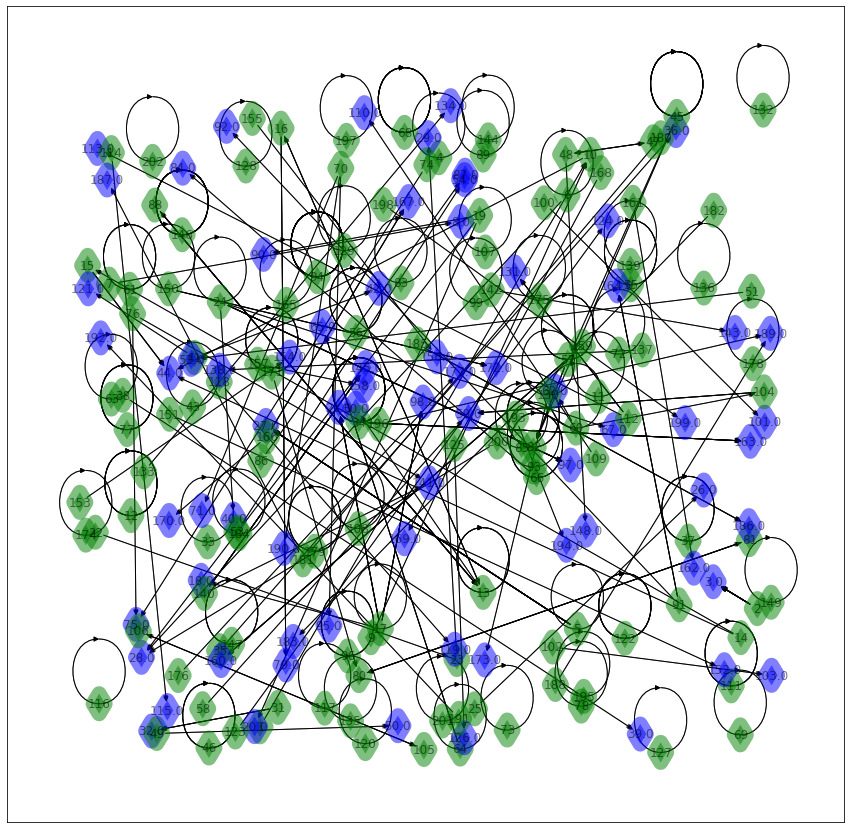

In [9]:
colors = []
pos = nx.random_layout(g)

for node in g:
    if node in df3['node1'].values:
       colors.append('g')
    else: 
       colors.append('b')
d = nx.degree(g)

d = [(d[node]+1) * 20 for node in g.nodes()]
plt.figure(3,figsize=(15,15)) 
nx.draw_networkx(g,pos, node_size=202, node_color=colors,node_shape="d", alpha=0.5, linewidths=15)
nx.draw_networkx_edges(g, pos, width=1,label=True)
plt.show()

In [10]:
dense = nx.adjacency_matrix(g).todense()
adj_df = pd.DataFrame(dense, index=g.nodes(), columns=g.nodes())
adj_df1=adj_df.loc[df4.node1, df4.node2]
#print(adj_df1)
e=adj_df1.columns.duplicated()
r=~e

adj_df1=adj_df1.loc[:,r]


t=adj_df1.index.duplicated()
s=~t
adj_df1=adj_df1.loc[s,:]

#adj_df.sort_values(by='weight',axis=0)
adj_df1

df11 = pd.DataFrame(adj_df1) 
df12=df11.copy()
df11

,10.0,3.0,4.0,5.0,6.0,8.0,11.0,12.0,13.0,15.0,...,187.0,189.0,190.0,192.0,194.0,195.0,197.0,199.0,201.0,202.0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
198,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
200,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
201,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [11]:
nw=df11.sum(axis=0)
nw

10.0     2
3.0      7
4.0      1
5.0      1
6.0      1
        ..
195.0    1
197.0    1
199.0    1
201.0    1
202.0    1
Length: 151, dtype: int64

In [12]:
naw=df11.sum(axis=1)
print(naw)

1      1
2      7
4      1
5      9
6      2
      ..
197    1
198    1
200    1
201    1
202    1
Length: 131, dtype: int64


In [13]:
smple_rows = df12.index[0:]
smple_co = df12.columns[0:]

for i in smple_co:
    for index,row in df12.iterrows():
        if df12.loc[index,i]>1:
            df12.loc[index,i]=1

df12

,10.0,3.0,4.0,5.0,6.0,8.0,11.0,12.0,13.0,15.0,...,187.0,189.0,190.0,192.0,194.0,195.0,197.0,199.0,201.0,202.0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
198,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
200,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
201,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [14]:
out_degree=df12.sum(axis=1)
print(out_degree)

1      1
2      1
4      1
5      2
6      2
      ..
197    1
198    1
200    1
201    1
202    1
Length: 131, dtype: int64


In [15]:
naw
d={'NAW':naw, 'OUT':out_degree}
r=pd.DataFrame(d)
#r=pd.DataFrame([naw,out_degree], columns = ['NAW','Out_degree']) 
#r["out_degree"]=out_degree
r

,NAW,OUT
1,1,1
2,7,1
4,1,1
5,9,2
6,2,2
...,...,...
197,1,1
198,1,1
200,1,1
201,1,1


In [16]:
#for index,row in r.iterrows():
uac_rank=(0.5*r['NAW'])+(0.5*r['OUT'])
print(uac_rank)

1      1.0
2      4.0
4      1.0
5      5.5
6      2.0
      ... 
197    1.0
198    1.0
200    1.0
201    1.0
202    1.0
Length: 131, dtype: float64


In [17]:
r["uac_rank"]=uac_rank
r

,NAW,OUT,uac_rank
1,1,1,1.0
2,7,1,4.0
4,1,1,1.0
5,9,2,5.5
6,2,2,2.0
...,...,...,...
197,1,1,1.0
198,1,1,1.0
200,1,1,1.0
201,1,1,1.0


In [18]:
# print(r)
r=r.sort_values(by=['uac_rank'],ascending=False)
r1=r.copy()
r1

,NAW,OUT,uac_rank
17,8,4,6.0
34,9,2,5.5
24,7,4,5.5
5,9,2,5.5
94,8,1,4.5
...,...,...,...
89,1,1,1.0
86,1,1,1.0
85,1,1,1.0
83,1,1,1.0


In [19]:
r2=r.copy()
r2

,NAW,OUT,uac_rank
17,8,4,6.0
34,9,2,5.5
24,7,4,5.5
5,9,2,5.5
94,8,1,4.5
...,...,...,...
89,1,1,1.0
86,1,1,1.0
85,1,1,1.0
83,1,1,1.0


In [20]:
r2
k1=len(r2[r2['uac_rank']>1])
print(k1)
r2.dtypes
predecessor12 = [pred for pred in g.predecessors(17)]
print(predecessor12)
r3 = pd.DataFrame(columns=r2.columns)
r3['node']=0

49
[17]


In [21]:
initial_seed1=[]
seed_counter1=0
#u=0
while seed_counter1<k1:
   # print("H")
    selected_node1=r2.index.values[0]
    #selected_node1=int(selected_node)
    #print(selected_node1)
    #predecessor =df12.index[df12[selected_node] == 1].tolist() 
    #predecessor=predecessor.astype(int)
    #print(g.predecessors(selected_node))
    predecessor1 = [pred for pred in g.predecessors(selected_node1)]
    #print(predecessor1)
    initial_seed1.append(selected_node1)
    #print(initial_seed1)
    #initial_seed=initial_seed.astype(int)
    for i in predecessor1:
       # print("h")
        if i not in initial_seed1:
            r2.at[i,'NAW']=r2.at[i,'NAW']-df11.at[i,selected_node1]
            r2.at[i,'OUT']=r2.at[i,'OUT']-1
            #print("l")
    r2['uac_rank']=(0.5*r2['NAW'])+(0.5*r2['OUT'])
    #if r2['uac_rank']>1:
    r3=r3.append({'node':selected_node1,'NAW': r2.at[selected_node1,'NAW'],'OUT': r2.at[selected_node1,'OUT'],'uac_rank': r2.at[selected_node1,'uac_rank']},ignore_index=True)
    r2=r2.drop(selected_node1,axis=0)
    seed_counter1=seed_counter1+1;
    #u=u+1
    r2=r2.sort_values(by=['uac_rank'],ascending=False)
#print(initial_seed1)
r3

,NAW,OUT,uac_rank,node
0,8.0,4.0,6.0,17.0
1,9.0,2.0,5.5,34.0
2,9.0,2.0,5.5,5.0
3,7.0,4.0,5.5,24.0
4,5.0,4.0,4.5,13.0
5,8.0,1.0,4.5,94.0
6,6.0,3.0,4.5,45.0
7,7.0,1.0,4.0,2.0
8,5.0,2.0,3.5,140.0
9,3.0,3.0,3.0,70.0


In [22]:
t2=[]
r3['recency_factor']=0
for i in initial_seed1:
    #print(i)
    for index,row in df_new.iterrows():
        if index==i:
            #print(index)
            t2.append(df_new.at[index,'sum'])
#print(t2)    

In [23]:
len(t2)
r3['recency_factor']=t2
r3

,NAW,OUT,uac_rank,node,recency_factor
0,8.0,4.0,6.0,17.0,1.762832
1,9.0,2.0,5.5,34.0,0.000000
2,9.0,2.0,5.5,5.0,1.539111
3,7.0,4.0,5.5,24.0,1.009859
4,5.0,4.0,4.5,13.0,0.000000
5,8.0,1.0,4.5,94.0,0.000000
6,6.0,3.0,4.5,45.0,0.000000
7,7.0,1.0,4.0,2.0,0.000000
8,5.0,2.0,3.5,140.0,1.023237
9,3.0,3.0,3.0,70.0,1.097780


In [24]:
r3=r3.sort_values(by=['recency_factor'],ascending=False)
#influencers1=influencers1.drop_duplicates(subset=['node', 'recency_factor'], keep=False)
#influencers1
r3

,NAW,OUT,uac_rank,node,recency_factor
15,3.0,2.0,2.5,64.0,1.913904
20,3.0,2.0,2.5,112.0,1.827684
0,8.0,4.0,6.0,17.0,1.762832
12,4.0,2.0,3.0,57.0,1.645144
2,9.0,2.0,5.5,5.0,1.539111
39,2.0,1.0,1.5,179.0,1.474897
29,3.0,1.0,2.0,12.0,1.239092
38,2.0,1.0,1.5,185.0,1.201117
21,3.0,2.0,2.5,171.0,1.137139
9,3.0,3.0,3.0,70.0,1.097780
